In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df=pd.read_excel("Superstore_USA.xlsx")
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [10]:
df.shape

(9426, 24)

First Point out the missing values

In [16]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [17]:
#to fill
df["Product Base Margin"].fillna(df["Product Base Margin"].mean(),inplace=True)# mean() is used to fill numerical data

In [28]:
df["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [29]:
df["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [31]:
df["Order Priority"].replace('Critical ','Critical')

0       Not Specified
1                High
2       Not Specified
3       Not Specified
4       Not Specified
            ...      
9421         Critical
9422         Critical
9423    Not Specified
9424             High
9425    Not Specified
Name: Order Priority, Length: 9426, dtype: object

In [27]:
df["Order Priority"]=df["Order Priority"].replace('Critical ','Critical')

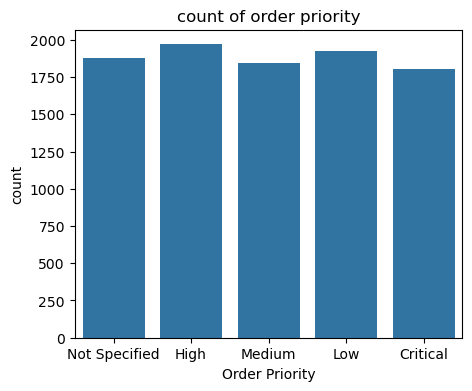

In [37]:
plt.figure(figsize=(5,4))

sns.countplot(x="Order Priority",data=df)
plt.title("count of order priority")
plt.savefig("count of order priority.jpg")
plt.show()

Which Ship Mode deliver how much product?

In [39]:
df["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [44]:
df["Ship Mode"].value_counts().index


Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [43]:
df["Ship Mode"].value_counts().values

array([7036, 1283, 1107])

In [45]:
x=df["Ship Mode"].value_counts().index
y=df["Ship Mode"].value_counts().values

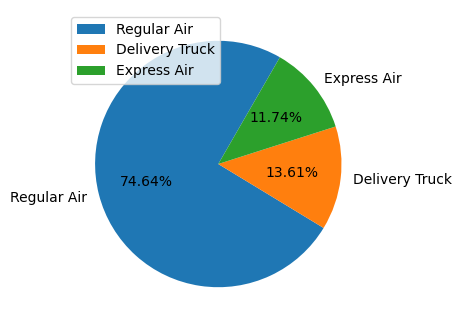

In [56]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

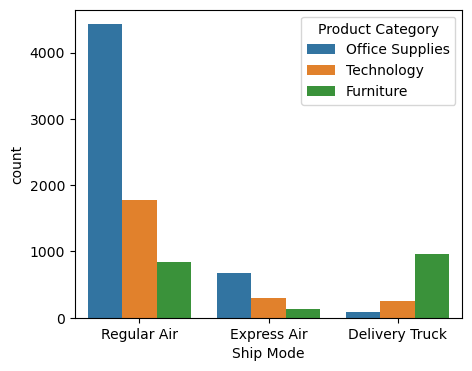

In [61]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=df,hue="Product Category")
plt.show()

Here,In regular air, office supplies is much occured.Then Technology.And then Fruniture.

# sob theke beshi customer segment kotha theke ashchhe?

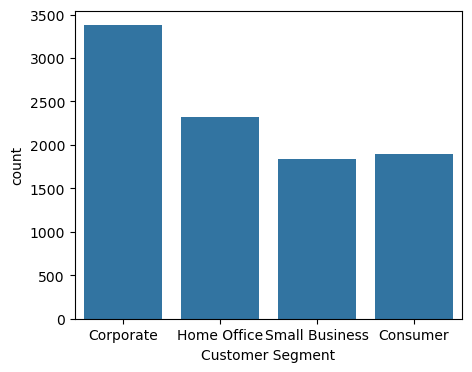

In [64]:

plt.figure(figsize=(5,4))
sns.countplot(x="Customer Segment",data=df)
plt.show()

We get highest customer from corporate sectore.

# Which category products are selling heigh?

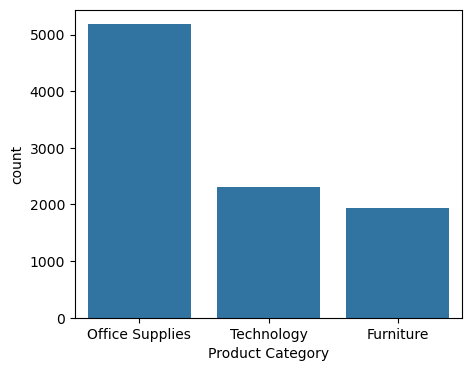

In [66]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=df)
plt.show()

hear, the heighest selling product is office supplies.Then technology.And then furmoture.

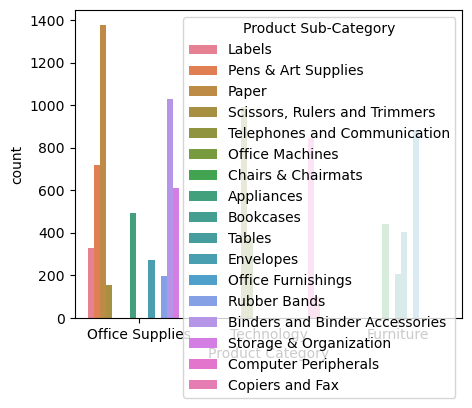

In [67]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=df,hue="Product Sub-Category")
plt.show()

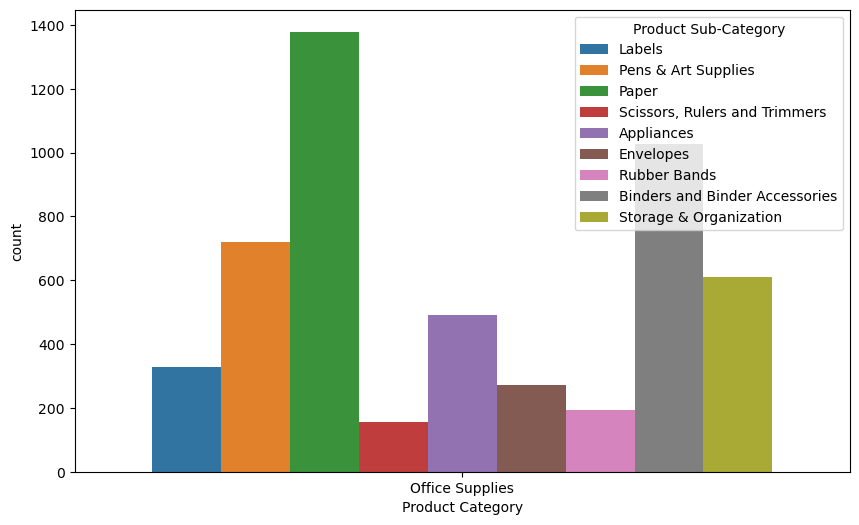

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=df[df["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

# Here.In Office supplies the heigh selling products are paper.

# order date theke order ber korte hbe

#to do that first ahve to do seperate the year.

In [74]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

to seprerate the year from date follow the elow method

In [72]:
df["Order Date"].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int32

Now to save the year crat a new column as order year

In [73]:
df["Order year"]=df["Order Date"].dt.year

kon year e kototuku sell hoyeche?